**# Venkatalakshmi Bandaru**

# Task-2 :Prediction using Unsupervised ML.

 # importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# Load the dataset

In [ ]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data = data.set_index('Id').rename(columns={'SepalLengthCm': 'Sepal Length',
                                           'SepalWidthCm': 'Sepal Width',
                                           'PetalLengthCm': 'Petal Length',
                                           'PetalWidthCm': 'Petal Width'})
data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [ ]:
# to find the number of rows & columns in the dataset. 
data.shape

(150, 5)

In [ ]:
# to find whether the data has any null value :
data.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

In [ ]:
#For calculating the statistical data like mean,percentile etc... 
data.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


 # Data visualization

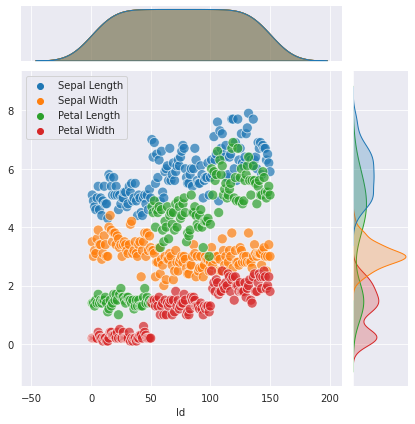

In [ ]:
sns.jointplot(data=data, s=100, alpha=0.7, height=6)
plt.show()

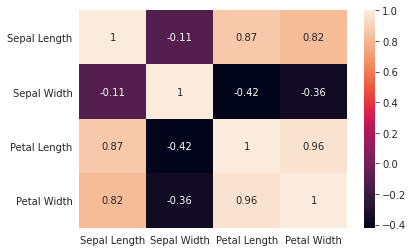

In [ ]:
# confusion matrix
sns.heatmap(data.corr(), annot = True, linecolor='black')

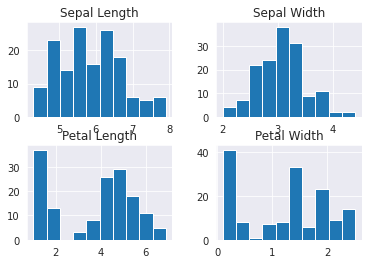

In [ ]:
data.hist()
plt.show()

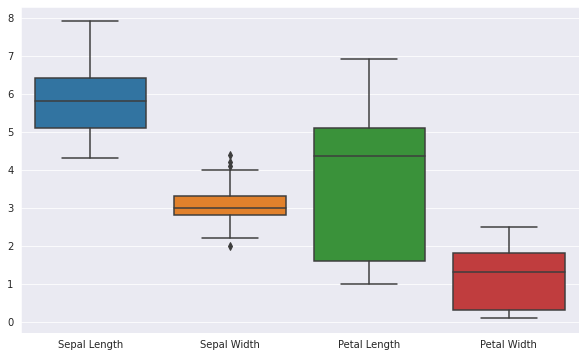

In [ ]:
# Distribution of data using Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.show()

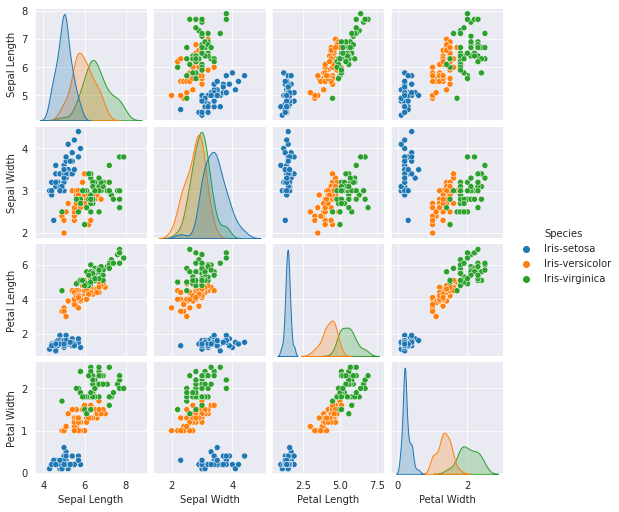

In [ ]:
sns.pairplot(data=data, hue='Species', height=1.8)
plt.show()

 
#Finding Optimum number of clusters for the Kmeans.

In [ ]:
# Petal-Length & Petal-Width are taken
X = data.iloc[:, [2,3]].values
y = data['Species'].map({'Iris-setosa': 0, 'Iris-virginica':1, 'Iris-versicolor':2}).values

In [ ]:
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (150, 2)
Shape of y: (150,)


In [ ]:
# finding optimum number of k-values 
wcss = []
for i in range(1,11):
    kmeans_c = KMeans(n_clusters=i, init='k-means++', 
                      max_iter = 300, n_init = 10, random_state=0)
    kmeans_c.fit(X)
    wcss.append(kmeans_c.inertia_)
    print(f'wcss {i}: {kmeans_c.inertia_}')

wcss 1: 550.6434666666667
wcss 2: 86.40394533571003
wcss 3: 31.38775897435898
wcss 4: 19.48238901098901
wcss 5: 13.933308757908758
wcss 6: 11.089786452241711
wcss 7: 9.337790756302523
wcss 8: 7.631802244955953
wcss 9: 6.472894541406307
wcss 10: 5.5542093364152185


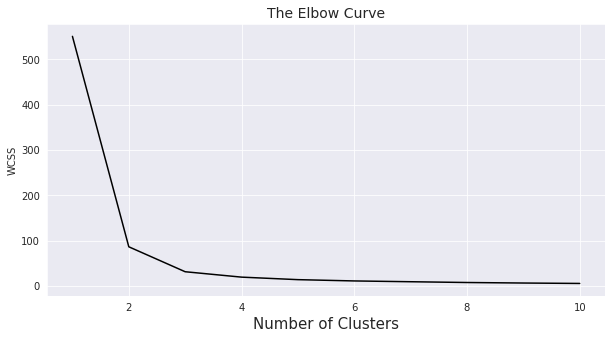

In [ ]:
# Plotting Elbow Curve
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss, color='black')
plt.title('The Elbow Curve', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('WCSS')
plt.show()

# According to the elbow method, we clearly say that the number of optimal k-clusters are 3

# Applying the Kmeans classifier and Making predictions

In [ ]:
kmeans = KMeans(n_clusters=3,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
 
y_kmeans = kmeans.fit_predict(x)

In [ ]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [ ]:
 kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

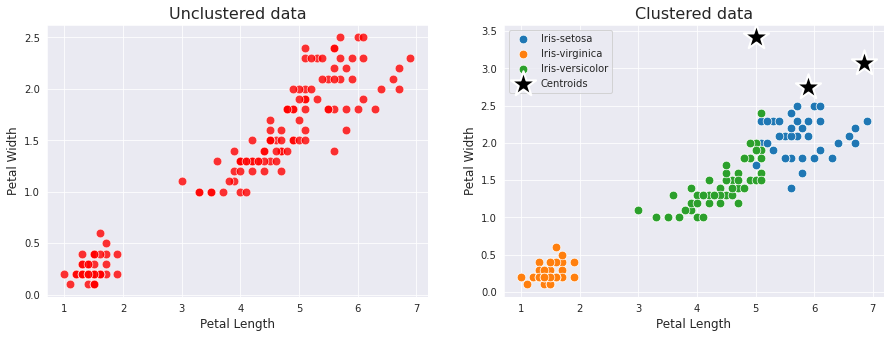

In [ ]:
species = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('Unclustered data', fontsize=16)
ax[0].set_xlabel('Petal Length', fontsize=12)
ax[0].set_ylabel('Petal Width', fontsize=12)
sns.scatterplot(data['Petal Length'], data['Petal Width'], 
                s=75, color='red', alpha=0.8, ax=ax[0])
ax[1].set_title('Clustered data', fontsize=16)
ax[1].set_xlabel('Petal Length', fontsize=12)
ax[1].set_ylabel('Petal Width', fontsize=12)
for i in range(0, 3):
    sns.scatterplot(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=75, label=species[i], ax=ax[1])
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
                s=700, color='black', label='Centroids', marker='*', ax=ax[1])